In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy import interpolate
import pandas as pd
%matplotlib inline

In [2]:
import giffy as gly

# ColorMesh demonstration

Firstly we'll create some data:

In [3]:
# Create three-dimensional array of data G(x, z, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

In [4]:
gly.ColorMesh(G).plot()

<AxesSubplot:>

## Plotting the correct axis for time

- 0: first axis
- 1: second axis
- 2: third axis

In [5]:
gly.ColorMesh(G).mark(time=2).plot()

<AxesSubplot:>

## Changing the colormap and vmin/max

In [6]:
gly.ColorMesh(G).mark(time=2, vmin=-1, vmax=1, cmap="Blues").plot()

<AxesSubplot:>

## Adding x, y information

In [7]:
gly.ColorMesh(G, x, y).mark(time=2, vmin=-1, vmax=1, x='xlabel', 
                            y='ylabel', c="mycolour").plot()

<AxesSubplot:xlabel='xlabel', ylabel='ylabel'>

# Contour

We can display the same data as a contour animation, which is a little more tricky, but doable.

In [8]:
gly.Contour(G, x, y).mark(time=2, cmap="RdBu").plot(2)

C:\Users\Gregory\Documents\Git\glyphy\glyphy\_contour.py:81: UserWarning: No contour levels were found within the data range.
  self.mpl = self.ax.contour(*preargs, Z0, **self._defargs)
C:\Users\Gregory\Documents\Git\glyphy\glyphy\_contour.py:71: UserWarning: No contour levels were found within the data range.
  self.ax.contour(*preargs, _array, **kwargs)


<AxesSubplot:>

In [17]:
def detick(fig, ax):
    ax.set_xticks([])
    ax.set_yticks([])

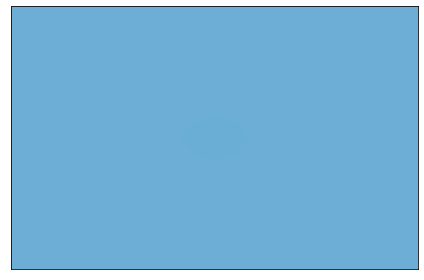

In [19]:
gl = gly.ColorMesh(G).mark(time=2, vmin=-1, vmax=1, cmap="Blues").cbar(False).callback(detick)
gl.time_seconds = 2
gl.save("gifs/cmesh.gif")